In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD  
from sklearn.neighbors import LocalOutlierFactor
from kneed import KneeLocator

# Charger les données
data = pd.read_csv("card_credit_fraud.csv").head(10000)

labels_true = data['isFraud'].values

# Séparer les caractéristiques et la cible
X = data.drop("isFraud", axis=1)


inertia = []
K_range=range(1,20)

# Sélectionner les colonnes numériques et catégoriques
numeric_features = ['transactionId', 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_features = ['type', 'nameOrig', 'nameDest']

# Créer les pipelines pour normaliser les données
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Créer un preprocessor qui combine les deux transformateurs
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])






le n_clusters afficace est : 4


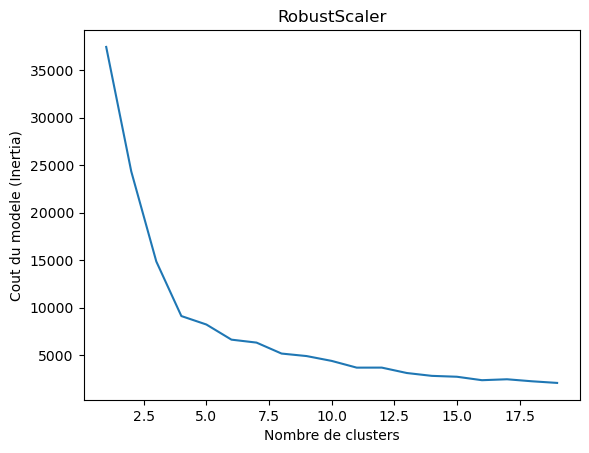

In [14]:
# Appliquer le preprocessor sur les caractéristiques
X_normalized = preprocessor.fit_transform(X)

# Détection d'anomalies avec Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Ajuster les paramètres selon vos besoins
outliers = lof.fit_predict(X_normalized)
X_cleaned = X_normalized[outliers != -1]

# Réduire la dimensionnalité à trois dimensions avec TruncatedSVD pour le graphique en 3D
svd_3d = TruncatedSVD(n_components=3)  # Utiliser 3 composantes principales
X_svd_3d = svd_3d.fit_transform(X_cleaned)

for k in K_range:
    # Utiliser K-Means pour effectuer le clustering sur les données réduites
    model_3d = KMeans(n_clusters=k)
    model_3d.fit(X_svd_3d)
    inertia.append(model_3d.inertia_)

plt.title("RobustScaler")
plt.plot(K_range, inertia)
plt.xlabel("Nombre de clusters")
plt.ylabel("Cout du modele (Inertia)")

kl=KneeLocator(
    K_range, inertia, curve="convex", direction="decreasing")
print(f"le n_clusters afficace est : {kl.elbow}")

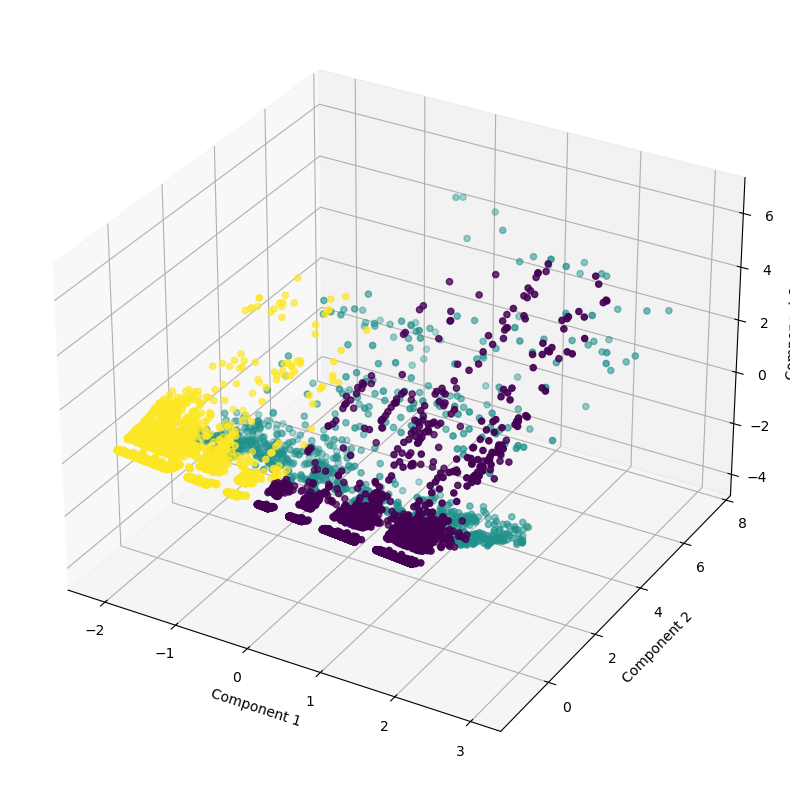

In [15]:
# Utiliser K-Means pour effectuer le clustering sur les données réduites
model_3d = KMeans(n_clusters=3)
model_3d.fit(X_svd_3d)

labels = model_3d.labels_
    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')  # Créer un axe 3D

ax.scatter(X_svd_3d[:, 0], X_svd_3d[:, 1], X_svd_3d[:, 2], c=model_3d.predict(X_svd_3d))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()

In [16]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

#Nombre de clusters et de bruits
print("Estimated number of clusters: %d" % len(set(labels)))
print("Estimated number of noise points: %d" % list(labels).count(-1))

#Affichage des métriques
print(f"Homogénéité : {homogeneity_score(labels_true, labels)}")
print(f"Complétude : {completeness_score(labels_true, labels)}")
print(f"V-mesure : {v_measure_score(labels_true, labels)}")
print(f"Indice de Rand ajusté : {adjusted_rand_score(labels_true, labels)}")
print(f"Information mututelle ajusté : {adjusted_mutual_info_score(labels_true, labels)}")
print(f"Coefficient de silhouette : {silhouette_score(X_preprocessed, labels)}")

Estimated number of clusters: 3
Estimated number of noise points: 0


ValueError: Found input variables with inconsistent numbers of samples: [9000, 8100]